In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#import data from google drive
path1 = '/content/drive/My Drive/Data/ChicagoCrimes/Chicago_Crimes_2005_to_2007.csv'
df_chicago_1 = pd.read_csv(path1,error_bad_lines=False)
path2 = "/content/drive/My Drive/Data/ChicagoCrimes/Chicago_Crimes_2008_to_2011.csv"
df_chicago_2 = pd.read_csv(path2,error_bad_lines=False)
path3 = "/content/drive/My Drive/Data/ChicagoCrimes/Chicago_Crimes_2012_to_2017.csv"
df_chicago_3 = pd.read_csv(path3,error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [0]:
chicago_df=pd.concat([df_chicago_1,df_chicago_2,df_chicago_3])
chicago_df['Date']=pd.to_datetime(chicago_df['Date'],format='%m/%d/%Y %I:%M:%S %p')

In [0]:
chicago_df.index=pd.DatetimeIndex(chicago_df.Date)

In [27]:
chicago_df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

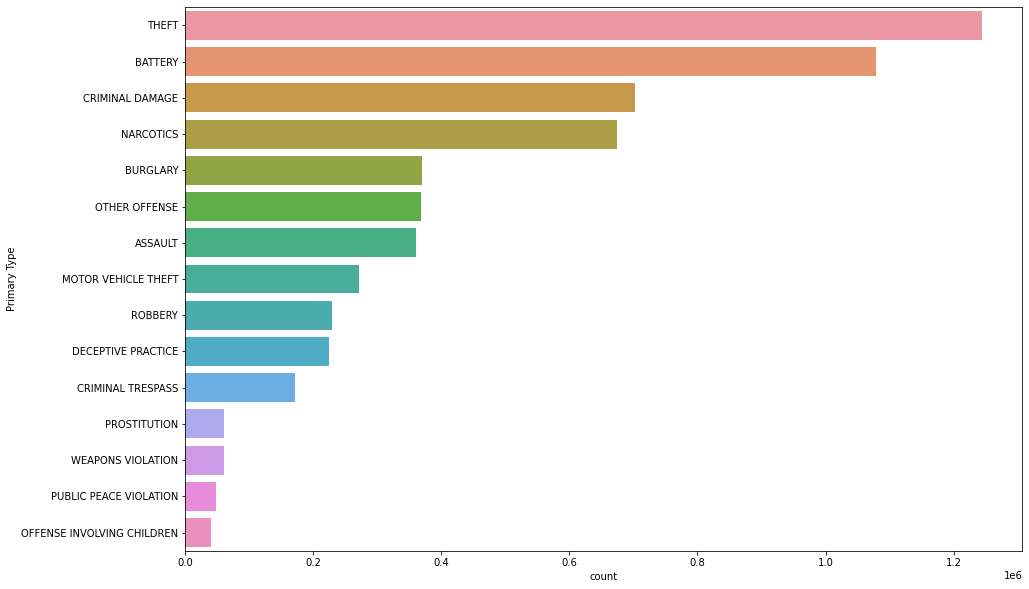

In [28]:
order_PrimaryType =chicago_df['Primary Type'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data= chicago_df, order =order_PrimaryType)

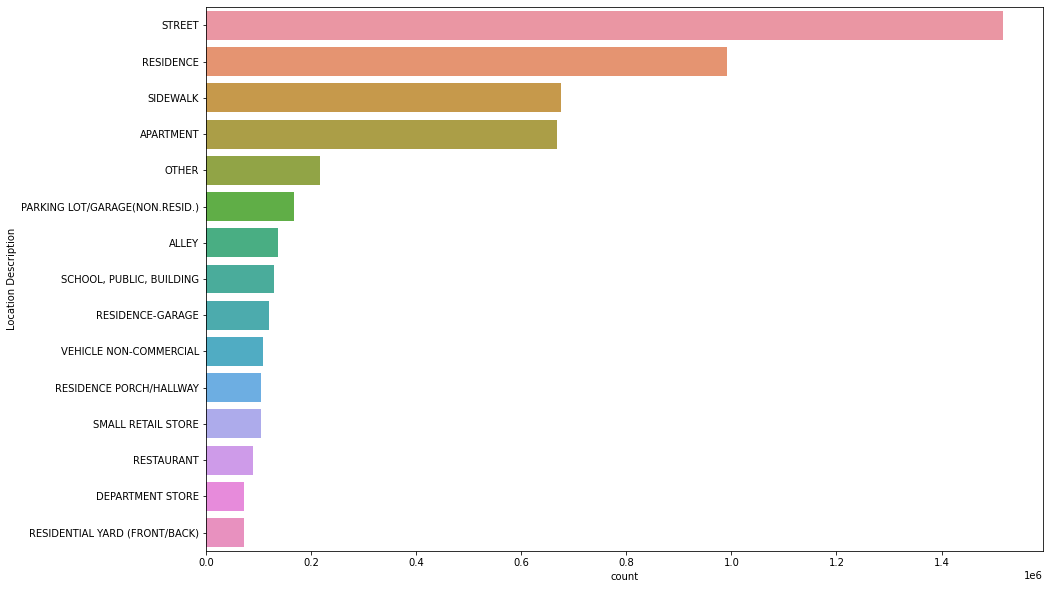

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description', data= chicago_df , order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [30]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0.5, 1.0, 'Crime count per year')

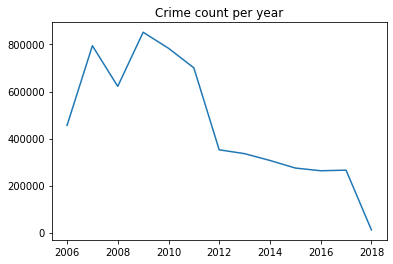

In [35]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime count per year')

Text(0.5, 1.0, 'Crime count per month')

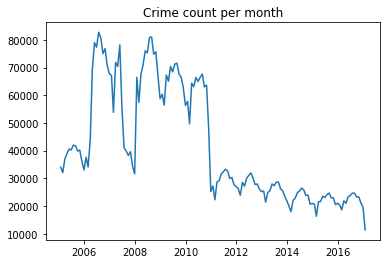

In [36]:
plt.plot(chicago_df.resample('m').size())
plt.title('Crime count per month')

Text(0.5, 1.0, 'Crime count per Quarter')

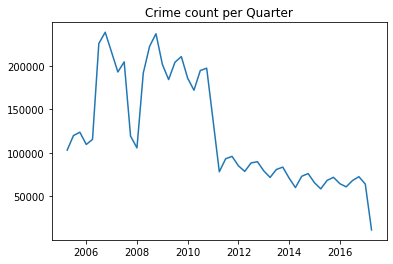

In [37]:
plt.plot(chicago_df.resample('q').size())
plt.title('Crime count per Quarter')

In [0]:
# preparing the data  
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [39]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [0]:
chicago_prophet.columns= ['Date', 'Crime Count']

In [0]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [42]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [44]:
from fbprophet import Prophet
m= Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods =720)
forecast = m.predict(future)

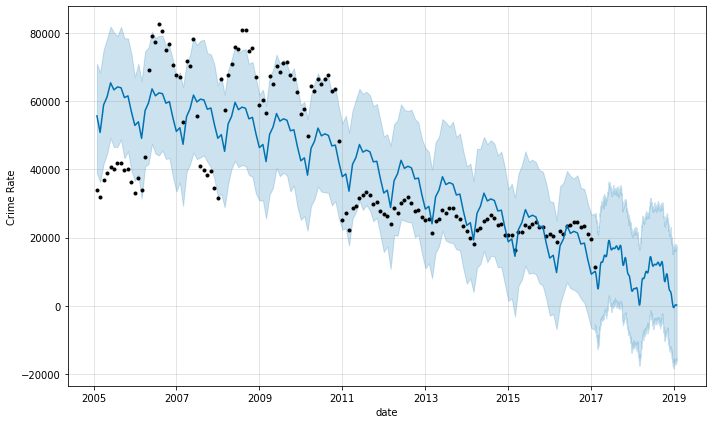

In [51]:
figure = m.plot(forecast , xlabel='date', ylabel='Crime Rate')

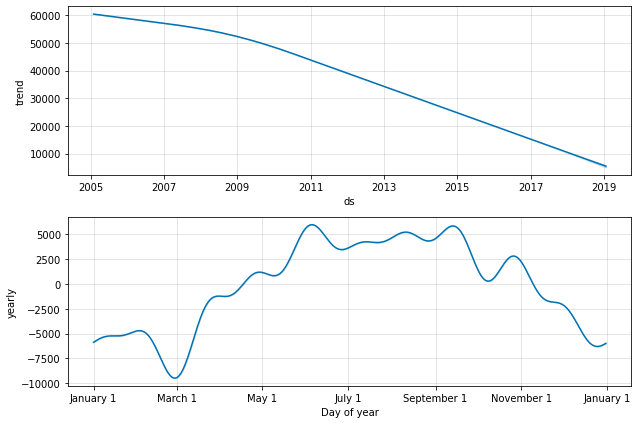

In [52]:
figure = m.plot_components(forecast)